In [45]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, NullLocator, MaxNLocator
from matplotlib.colors import Normalize
%matplotlib inline

In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:86.0) Gecko/20100101 Firefox/86.0'}
page_all_results = requests.get('https://www.parkrun.ru/results/courserecords/', headers=headers)

In [3]:
data = pd.read_html(page_all_results.text)[0]
data.drop(data.columns[[1, 5]], axis=1, inplace=True)
data.rename(columns={data.columns[0][0]: 'Parkrun'}, inplace=True)

# Рекорды трассы

In [4]:
data

Parkrun              Женщины                     \
                        Паркран             Участник  Время        Дата   
0               Angarskie Prudy      Марина ЖАЛЫБИНА  20:24  27/07/2019   
1         Babushkinsky na Yauze               Женя Л  19:58  03/04/2021   
2         Balashikha Zarechnaya  Наталья СТУДЕНИКИНА  17:53  03/04/2021   
3          Belgorod Park Pobedy       Ксения АВДЕЕВА  19:56  10/08/2019   
4                         Bitsa       Анна БАЛАКШИНА  18:52  12/08/2017   
..                          ...                  ...    ...         ...   
87      Yarmarochnaya Ploshchad   Екатерина УЗБЕКОВА  25:38  03/04/2021   
88  Yoshkar-Ola Alleya Zdorovya     Людмила ЛЕБЕДЕВА  20:13  10/04/2021   
89                  Zatyumensky          Анна ПОПОВА  20:02  03/08/2019   
90                   Zelenograd       Ксения АВДЕЕВА  18:43  09/06/2018   
91                    Zhukovsky        Нина РОМАШОВА  20:19  03/04/2021   

              Мужчины                     
             Участник  Время        Дата  
0       Фёдор БАКУЛОВ  16:53  28/09/2019  
1    Александр ХАНКОВ  16:41  10/04/2021  
2       Роман САЗОНОВ  15:40  08/09/2018  
3    Михаил ЗВЯГИНЦЕВ  16:26  07/03/2020  
4     Виктор НИКОЛАЕВ  16:04  27/10/2018  
..                ...    ...         ...  
87  Александр ПОЛЯКОВ  19:12  03/04/2021  
88  Николай ИВАНУШКИН  17:20  13/03/2021  
89    Алексей ЛЕБЕДЕВ  16:36  04/05/2019  
90     Сергей СОРОКИН  15:34  27/07/2019  
91    Виктор НИКОЛАЕВ  16:10  20/04/2019  

[92 rows x 7 columns]

Записи с "нетипичными" данными

In [5]:
mask = (data[data.columns[3]].str.len() > 10) | (data[data.columns[6]].str.len() > 10)
data.loc[mask]

Parkrun                     Женщины         \
                     Паркран                    Участник  Время   
7    Cheboksary naberezhnaya            Людмила ХОДАКОВА  19:14   
9        Chelyabinsk Ekopark          Анастасия СОКОЛОВА  20:48   
18      Gorodskoy Park Semya             Оксана ХАФИЗОВА  20:40   
21             Kazan Central  Рамиля ШАГИЕВААлсу ШАГИЕВА  20:29   
40    Mytishchi Central Park        Evgeniya RUMYANTSEVA  21:01   
50               Park Kirova          Ольга ФЕОФИЛАКТОВА  21:54   
51          Park Talalikhina         Наталья ТАРАНТИНОВА  21:50   
58  Ramenskoe Gorodskoy Park             Ирина КУЗЬМЕНКО  21:23   
67       Skver Dzerzhinskogo               Наталья ДЖОЛИ  21:23   

                                           Мужчины         \
                           Дата           Участник  Время   
7                    27/07/2019       Михаил УМНОВ  16:51   
9   Новый рекорд на этой неделе    Евгений КУЛИКОВ  17:46   
18  Новый рекорд на этой неделе  Динар ФАХРИСЛАМОВ  19:35   
21         27/08/201627/08/2016      Кирилл ДЯТЛОВ  16:28   
40                   03/04/2021       Anton EFIMOV  18:16   
50                   12/10/2019     Pavel KASATKIN  16:32   
51  Новый рекорд на этой неделе      Эдуард СЫРЦОВ  16:21   
58  Новый рекорд на этой неделе       Олег ПОЛЯКОВ  17:58   
67                   14/12/2019    Евгений ЗОРЯНОВ  18:11   

                                 
                           Дата  
7   Новый рекорд на этой неделе  
9                    14/09/2019  
18  Новый рекорд на этой неделе  
21                   12/10/2019  
40  Новый рекорд на этой неделе  
50  Новый рекорд на этой неделе  
51                   03/04/2021  
58  Новый рекорд на этой неделе  
67  Новый рекорд на этой неделе

## Список всех российских паркранов

In [6]:
russian_parkruns = data[data.columns[0]]

Всего активных паркранов в России:

In [7]:
len(russian_parkruns)

92

In [8]:
pd.set_option('display.max_rows', None)
russian_parkruns

0                 Angarskie Prudy
1           Babushkinsky na Yauze
2           Balashikha Zarechnaya
3            Belgorod Park Pobedy
4                           Bitsa
5                     Boeva Dacha
6                          Butovo
7         Cheboksary naberezhnaya
8                     Chelyabinsk
9             Chelyabinsk Ekopark
10      Chertanovo Pokrovsky Park
11                    Dolgoprudny
12                        Druzhba
13                  Elagin Ostrov
14                    Filatov Lug
15                           Fili
16            Gatchina Prioratsky
17                     Gorky Park
18           Gorodskoy Park Semya
19                 Gubernsky Park
20                      Izmailovo
21                  Kazan Central
22                         Khimki
23                          Kimry
24           Kolchugino City Park
25                    Kolomenskoe
26                        Kolpino
27                    Komsomolsky
28                        Korolev
29       Krasn

In [9]:
russian_parkruns.to_csv('russian_parkruns.csv', index=False)

## Анализ мужских результатов

### Топ10 рекордов мужчин и самых быстрых российских паркранов

In [10]:
data.drop(data.iloc[:,1:4], axis=1).sort_values(by=[data.columns[5]]).reset_index(drop=True).head(10)

Parkrun              Мужчины                   
                Паркран             Участник  Время        Дата
0                Tambov         Леон АРТЁМОВ  14:28  08/06/2019
1            Gorky Park     Вячеслав СОКОЛОВ  14:50  27/04/2019
2         Elagin Ostrov     Валентин СМИРНОВ  14:53  10/08/2019
3  Ufa Botanichesky Sad     Григорий АНДРЕЕВ  14:57  12/05/2018
4     Mega Park Kudrovo    Дмитрий ТРИПУТЕНЬ  15:01  21/07/2018
5              Sosnovka  Станислав АГЕЛЬЯРОВ  15:11  01/06/2019
6        Ryazan Central     Александр ИМЕНИН  15:14  27/08/2016
7           Vernadskogo     Вячеслав СОКОЛОВ  15:16  13/04/2019
8           Meshchersky     Вячеслав СОКОЛОВ  15:18  08/06/2019
9        Ryazan Oreshek     Александр ИМЕНИН  15:18  28/12/2019

### Топ5 мужчин с наибольшим количеством рекордов на разных паркранах

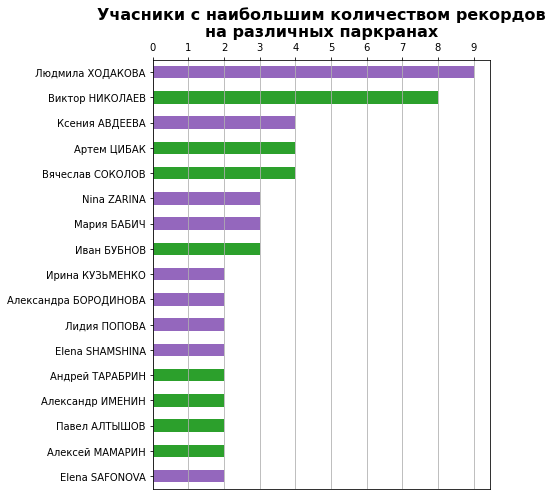

In [49]:
rec_men = data[data.columns[4]].value_counts()
rec_women = data[data.columns[1]].value_counts()
most_rec_men = rec_men[rec_men > 1]
most_rec_women = rec_women[rec_women > 1]
df = pd.concat([most_rec_men, most_rec_women], axis = 0).sort_values(ascending=True)
plt.figure(figsize=(7,7))
ax = df.plot(kind = 'barh', grid=True)
for ptch, tick in zip(ax.patches, ax.yaxis.get_major_ticks()):
    c = '#2ca02c' if tick.label.get_text() in most_rec_men.index else '#9467bd'
    ptch.set_facecolor(c)

ax.grid(b=False, which='major', axis='y')

ax.xaxis.set_major_locator(MaxNLocator(steps=[1, 2], integer=True))
ax.xaxis.tick_top()
plt.title('Учасники с наибольшим количеством рекордов\nна различных паркранах', size=16, fontweight='bold')
plt.tight_layout()

### 10 самых медленных паркранов (где мужские рекорды пока не высокие)

In [12]:
data.drop(data.iloc[:,1:5], axis=1).drop(data.columns[6], axis=1)\
.sort_values(by=[data.columns[5]], ascending=False).reset_index(drop=True).head(10)

,Parkrun,Мужчины
,Паркран,Время
0,Strezhevoy Gorodskoy Park,22:41
1,Lobnya Gorodskoy Park,19:35
2,Gorodskoy Park Semya,19:35
3,Yarmarochnaya Ploshchad,19:12
4,Gubernsky Park,18:50
5,Lesopark Severny,18:33
6,Kurgan Central Park,18:16
7,Mytishchi Central Park,18:16
8,Skver Dzerzhinskogo,18:11


## Анализ женских результатов

### Топ10 рекордов женщин и самых быстрых российских паркранов

In [13]:
data.drop(data.iloc[:,4:], axis=1).sort_values(by=[data.columns[2]]).reset_index(drop=True).head(10)

Parkrun              Женщины                   
                 Паркран             Участник  Время        Дата
0   Ufa Botanichesky Sad        Юлия АНДРЕЕВА  16:02  17/08/2019
1          Elagin Ostrov    Анжелика ШЕВЧЕНКО  17:14  10/08/2019
2         Readovsky Park     Оксана СТОЛЯРОВА  17:24  22/06/2019
3             Gorky Park       Мария БЫСТРОВА  17:26  21/05/2016
4  Pokrovskoe-Streshnevo   Наталия ГРИГОРЬЕВА  17:42  01/06/2019
5         Ryazan Oreshek        Мария ИМЕНИНА  17:42  08/09/2018
6                Druzhba          Nina ZARINA  17:45  08/06/2019
7  Balashikha Zarechnaya  Наталья СТУДЕНИКИНА  17:53  03/04/2021
8            Kolomenskoe       Ксения АВДЕЕВА  17:57  17/08/2019
9            Natashinsky         Gella HUGINN  18:01  26/05/2018

### Топ5 женщин с наибольшим количеством рекордов на разных паркранах

In [14]:
data[data.columns[1]].value_counts()[:5]

Людмила ХОДАКОВА    9
Ксения АВДЕЕВА      4
Мария БАБИЧ         3
Nina ZARINA         3
Лидия ПОПОВА        2
Name: (Женщины, Участник), dtype: int64

### 10 самых медленных паркранов (где женские рекорды пока не высокие)

In [15]:
data.drop(data.iloc[:,3:], axis=1).drop(data.columns[1], axis=1)\
.sort_values(by=[data.columns[2]], ascending=False).reset_index(drop=True).head(10)

,Parkrun,Женщины
,Паркран,Время
0,Strezhevoy Gorodskoy Park,29:09
1,Yarmarochnaya Ploshchad,25:38
2,Maykop Gorodskoy Park,23:52
3,Lobnya Gorodskoy Park,23:43
4,Nizhny Prud,22:28
5,Kurgan Central Park,22:17
6,Komsomolsky,22:09
7,Lesopark Severny,22:08
8,Starye Sady,22:08


## Разное

Проверка данных на консистентность

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   (Parkrun, Паркран)   92 non-null     object
 1   (Женщины, Участник)  92 non-null     object
 2   (Женщины, Время)     92 non-null     object
 3   (Женщины, Дата)      92 non-null     object
 4   (Мужчины, Участник)  92 non-null     object
 5   (Мужчины, Время)     92 non-null     object
 6   (Мужчины, Дата)      92 non-null     object
dtypes: object(7)
memory usage: 5.2+ KB


In [17]:
data.shape

(92, 7)

In [18]:
data.columns

MultiIndex([('Parkrun',  'Паркран'),
            ('Женщины', 'Участник'),
            ('Женщины',    'Время'),
            ('Женщины',     'Дата'),
            ('Мужчины', 'Участник'),
            ('Мужчины',    'Время'),
            ('Мужчины',     'Дата')],
           )

In [19]:
data[data.columns[5]] = ('00:' + data[data.columns[5]]).apply(pd.to_timedelta)

In [20]:
data.head(20)

Parkrun                Женщины         \
                      Паркран               Участник  Время   
0             Angarskie Prudy        Марина ЖАЛЫБИНА  20:24   
1       Babushkinsky na Yauze                 Женя Л  19:58   
2       Balashikha Zarechnaya    Наталья СТУДЕНИКИНА  17:53   
3        Belgorod Park Pobedy         Ксения АВДЕЕВА  19:56   
4                       Bitsa         Анна БАЛАКШИНА  18:52   
5                 Boeva Dacha           Анна КАРАСЮК  19:36   
6                      Butovo        Дарья ЧУДАЙКИНА  18:39   
7     Cheboksary naberezhnaya       Людмила ХОДАКОВА  19:14   
8                 Chelyabinsk  Антонина ОГОРОДНИКОВА  18:18   
9         Chelyabinsk Ekopark     Анастасия СОКОЛОВА  20:48   
10  Chertanovo Pokrovsky Park        Elena SHAMSHINA  20:14   
11                Dolgoprudny       Марина ГЕОРГИЕВА  19:22   
12                    Druzhba            Nina ZARINA  17:45   
13              Elagin Ostrov      Анжелика ШЕВЧЕНКО  17:14   
14                Filatov Lug        Диана МАРТЫНОВА  20:42   
15                       Fili      Екатерина ШЛЯХОВА  20:45   
16        Gatchina Prioratsky       Вера ВИНОГРАДОВА  20:45   
17                 Gorky Park         Мария БЫСТРОВА  17:26   
18       Gorodskoy Park Semya        Оксана ХАФИЗОВА  20:40   
19             Gubernsky Park        Ирина КУЗЬМЕНКО  22:03   

                                           Мужчины                  \
                           Дата           Участник           Время   
0                    27/07/2019      Фёдор БАКУЛОВ 0 days 00:16:53   
1                    03/04/2021   Александр ХАНКОВ 0 days 00:16:41   
2                    03/04/2021      Роман САЗОНОВ 0 days 00:15:40   
3                    10/08/2019   Михаил ЗВЯГИНЦЕВ 0 days 00:16:26   
4                    12/08/2017    Виктор НИКОЛАЕВ 0 days 00:16:04   
5                    19/12/2020        Иван БУБНОВ 0 days 00:15:58   
6                    22/08/2015    Виктор НИКОЛАЕВ 0 days 00:15:57   
7                    27/07/2019       Михаил УМНОВ 0 days 00:16:51   
8                    23/07/2016      Алексей РЫЖОВ 0 days 00:16:17   
9   Новый рекорд на этой неделе    Евгений КУЛИКОВ 0 days 00:17:46   
10                   09/11/2019    Андрей ТАРАБРИН 0 days 00:17:43   
11                   01/06/2019     Платон КИСЕЛЕВ 0 days 00:16:24   
12                   08/06/2019    Алекс БАЗАРЕЛЛО 0 days 00:17:15   
13                   10/08/2019   Валентин СМИРНОВ 0 days 00:14:53   
14                   10/04/2021    Dmitry MARTYNOV 0 days 00:17:10   
15                   10/04/2021    Андрей ТАРАБРИН 0 days 00:17:27   
16                   05/10/2019    Yury VINOGRADOV 0 days 00:18:00   
17                   21/05/2016   Вячеслав СОКОЛОВ 0 days 00:14:50   
18  Новый рекорд на этой неделе  Динар ФАХРИСЛАМОВ 0 days 00:19:35   
19                   20/03/2021     Андрей НАЗАРОВ 0 days 00:18:50   

                                 
                           Дата  
0                    28/09/2019  
1                    10/04/2021  
2                    08/09/2018  
3                    07/03/2020  
4                    27/10/2018  
5                    10/04/2021  
6                    06/07/2019  
7   Новый рекорд на этой неделе  
8                    24/09/2016  
9                    14/09/2019  
10                   09/11/2019  
11                   04/05/2019  
12                   18/01/2020  
13                   10/08/2019  
14                   10/04/2021  
15                   10/04/2021  
16                   20/07/2019  
17                   27/04/2019  
18  Новый рекорд на этой неделе  
19                   16/01/2021

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   (Parkrun, Паркран)   92 non-null     object         
 1   (Женщины, Участник)  92 non-null     object         
 2   (Женщины, Время)     92 non-null     object         
 3   (Женщины, Дата)      92 non-null     object         
 4   (Мужчины, Участник)  92 non-null     object         
 5   (Мужчины, Время)     92 non-null     timedelta64[ns]
 6   (Мужчины, Дата)      92 non-null     object         
dtypes: object(6), timedelta64[ns](1)
memory usage: 5.2+ KB


In [22]:
pd.to_timedelta('00:' + data[data.columns[2]])

0    0 days 00:20:24
1    0 days 00:19:58
2    0 days 00:17:53
3    0 days 00:19:56
4    0 days 00:18:52
5    0 days 00:19:36
6    0 days 00:18:39
7    0 days 00:19:14
8    0 days 00:18:18
9    0 days 00:20:48
10   0 days 00:20:14
11   0 days 00:19:22
12   0 days 00:17:45
13   0 days 00:17:14
14   0 days 00:20:42
15   0 days 00:20:45
16   0 days 00:20:45
17   0 days 00:17:26
18   0 days 00:20:40
19   0 days 00:22:03
20   0 days 00:18:27
21   0 days 00:20:29
22   0 days 00:19:57
23   0 days 00:19:34
24   0 days 00:19:18
25   0 days 00:17:57
26   0 days 00:20:10
27   0 days 00:22:09
28   0 days 00:19:11
29   0 days 00:18:47
30   0 days 00:19:05
31   0 days 00:22:17
32   0 days 00:18:16
33   0 days 00:22:08
34   0 days 00:23:43
35   0 days 00:23:52
36   0 days 00:19:07
37   0 days 00:18:12
38   0 days 00:19:14
39   0 days 00:18:22
40   0 days 00:21:01
41   0 days 00:18:01
42   0 days 00:19:42
43   0 days 00:22:28
44   0 days 00:21:26
45   0 days 00:19:57
46   0 days 00:19:06
47   0 days 0

In [23]:
data[data.columns[6]] = data[data.columns[6]].astype('str')
#df['B'] = df['B'].astype('str')